# Fábio Alves de Freitas - PPGIA - Computação Evolutiva - Atividade 1

In [1]:
import random

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt

# 1ª questão

In [2]:
def print_board(individual):
    for i in range(len(individual)):
        for j in range(len(individual)):
            if j == individual[i]:
                print('x ', end='')
            else:
                print('- ', end='')
        print()

In [3]:
def evalNQueens(individual):
    size = len(individual)
    #Count the number of conflicts with other queens.
    #The conflicts can only be diagonal, count on each diagonal line
    left_diagonal = [0] * (2*size-1)
    right_diagonal = [0] * (2*size-1)
    
    #Sum the number of queens on each diagonal:
    for i in range(size):
        left_diagonal[i+individual[i]] += 1
        right_diagonal[size-1-i+individual[i]] += 1
    
    #Count the number of conflicts on each diagonal
    sum_ = 0
    for i in range(2*size-1):
        if left_diagonal[i] > 1:
            sum_ += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            sum_ += right_diagonal[i] - 1
    return sum_,

In [4]:
def questao1(seed=0):
    random.seed(seed)
    
    NB_QUEENS = 8

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalNQueens)
    toolbox.register("mate", tools.cxOnePoint)                            # cruzamento de 1 ponto
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)        # mutação swap
    toolbox.register("select", tools.selTournament, tournsize=5)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

[6, 3, 3, 0, 7, 4, 1, 5]
- - - - - - x - 
- - - x - - - - 
- - - x - - - - 
x - - - - - - - 
- - - - - - - x 
- - - - x - - - 
- x - - - - - - 
- - - - - x - - 


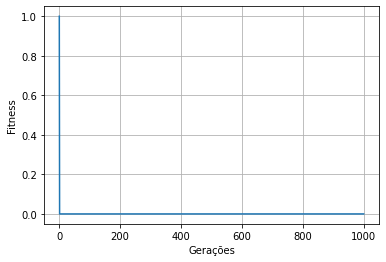

In [5]:
if __name__ == "__main__":
    pop, log, _ = questao1(2)
    
    print(pop[-1])
    print_board(pop[-1])
    
    # grafico
    gen = log.select('gen')
    best_per_gen = log.select('min')
    
    plt.plot(gen, best_per_gen)
    plt.grid()
    plt.xlabel('Gerações')
    plt.ylabel('Fitness')
    plt.show()

# 2ª questão

## Formato 1
* cxTwoPoint
* mutShuffleIndexes
* selTournament 10

In [6]:
# Xover de 2 pontos
def questao2_1(seed=0):
    random.seed(seed)
    
    NB_QUEENS = 8

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalNQueens)
    toolbox.register("mate", tools.cxTwoPoint)                            # cruzamento de 1 ponto
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)        # mutação swap
    toolbox.register("select", tools.selTournament, tournsize=5)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

## Formato 2
* cxOnePoint
* mutShuffleIndexes
* selRoulette

In [7]:
# Xover de 2 pontos
def questao2_2(seed=0):
    random.seed(seed)
    
    NB_QUEENS = 8

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalNQueens)
    toolbox.register("mate", tools.cxOnePoint)                            # cruzamento de 1 ponto
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)        # mutação swap
    toolbox.register("select", tools.selRoulette)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

## Formato 3
* cxPartialyMatched
* mutShuffleIndexes
* selRandom

In [8]:
# Xover de 2 pontos
def questao2_3(seed=0):
    random.seed(seed)
    
    NB_QUEENS = 8

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalNQueens)
    toolbox.register("mate", tools.cxPartialyMatched)                            # cruzamento de 1 ponto
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)        # mutação swap
    toolbox.register("select", tools.selRandom)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=1000, stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

## Avaliação de desempenho

In [18]:
# busca a geração que encontrou a solução ótima do problema
# o melhor resultado é aquele que encontrar a solução ótima de menor index
def funcao_objetivo(log):
    min = log.select('min')
    if 0 in min:
        return min.index(0)
    return float('inf')

c:\Users\fbioa\Desktop\Comp Evolutiva\env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\fbioa\Desktop\Comp Evolutiva\env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


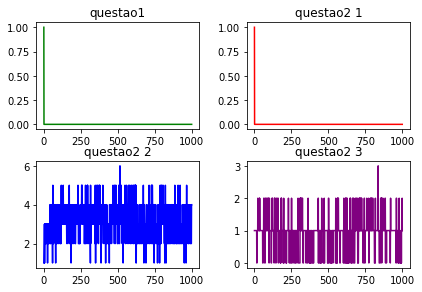

questao 1:  1
questao 2 formato 1:  1
questao 2 formato 2:  inf
questao 2 formato 3:  16


In [19]:

if __name__ == "__main__":
    _, log1, _ = questao1()
    _, log2_1, _ = questao2_1()
    _, log2_2, _ = questao2_2()
    _, log2_3, _ = questao2_3()




    # grafico
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()

    axs[0,0].plot(log1.select('gen'), log1.select('min'), color='green')
    axs[0,0].set(title="questao1")

    axs[0,1].plot(log2_1.select('gen'), log2_1.select('min'), color='red')
    axs[0,1].set(title="questao2 1")

    axs[1,0].plot(log2_2.select('gen'), log2_2.select('min'), color='blue')
    axs[1,0].set(title="questao2 2")

    axs[1,1].plot(log2_3.select('gen'), log2_3.select('min'), color='purple')
    axs[1,1].set(title="questao2 3")

    plt.show()
        
        
        
        
        
    # avaliação de desempenho
    print("questao 1: ", funcao_objetivo(log1))
    print("questao 2 formato 1: ", funcao_objetivo(log2_1))
    print("questao 2 formato 2: ", funcao_objetivo(log2_2))
    print("questao 2 formato 3: ", funcao_objetivo(log2_3))
    

## De acordo com a função objetivo definida acima, a melhor configuração é aquela que acha a solução do problema mais rápido, ou seja, com o menor index. De acordo com os resultados acima, pode-se observar que a configuração da questão 2 e o primeiro formato da questão 2 empataram. O terceiro lugar, e ainda aceitável para os parâmetros do problema foi o terceiro formato da questão 2. Já o segundo formato da questão foi não conseguiu convergir.